In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("../Generic scripts")
import nnmfornfs.utils_kernels as KT 
import utils_density as utils
import utils_data_generator as generators

In [28]:
#path to saved tensors
pt_path = "ExperimentsStupid/tensors/"
fig_path = "ExperimentsStupid/figures/"
csv_pat = "ExperimentsStupid/tables/"

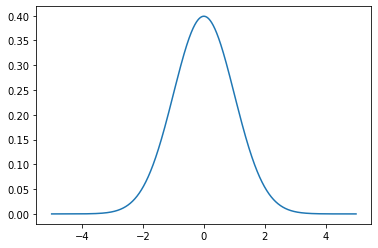

In [45]:
# Number of data points we will be using and basic parameters of the model
ndata = 10000
# data generator : gaussian mixture
density_fun = generators.generateGaussianD(torch.zeros(1),1,1,1)[1]

def gen(n=ndata):
    return torch.linspace(-5,5,ndata).view(ndata,1)

d = 1

base = '1'
mu_base,eta_base = torch.zeros((d,)),10

xdata_set = gen()
data_pathx = pt_path + 'xdataExperiments.pt'
data_pathy = pt_path + 'ydataExperiments.pt'
ydata_set = density_fun(xdata_set)

torch.save(xdata_set,data_pathx)
torch.save(ydata_set,data_pathy)

data_set = xdata_set,ydata_set

plt.plot(xdata_set,ydata_set)

def data_split(data_set,r=0.5):
    xdata,ydata =data_set
    n = xdata.size(0)
    l = np.array(range(n))
    np.random.shuffle(l)
    xdata = xdata[l,:]
    ydata = ydata[l]
    del l
    ntr = int(np.ceil(n*r))
    nts = n - ntr
    data_set_train = xdata[:ntr,:],ydata[:ntr]
    data_set_test = xdata[ntr:,:],ydata[ntr:]
    return data_set_train,data_set_test

    

def squareloss(px,data_set_test):
    #Here eps is the moreau smoothing parameter
    xtest,ytest = data_set_test
    ntest = xtest.size(0)
    p = px(xtest)
    return ((ytest - p)**2).mean()
   

    

In [46]:
def makepx(data_set,la,sigma =1,Niter = 100):
    xdata,ydata = data_set
    kmodel = utils.kernelModel(sigma,xdata,kernel = 'gaussian',c = 0,base = base,mu_base = mu_base,eta_base = eta_base)
    dm = utils.funApproxModelNW(kmodel,la,ydata)
    al = dm.FISTA(Niter)
    def pxx(x):
        return kmodel.px(al,x)
    return pxx

In [48]:
la_list = [1,0.1,0.01,0.001,0.0001,1e-5,1e-6]
sigma_l = [1.41]
param_list = []
for la in la_list:
    for sigma in sigma_l:
        param_list.append([la,sigma])
NN = len(param_list)
res = torch.zeros((3,NN))
res[1:,:] = torch.tensor(param_list).T

r = 0.7
K = 1
res_list = []
xdata_set = torch.load(data_pathx)
ydata_set = torch.load(data_pathy)
data_set =xdata_set,ydata_set
for i in range(NN):
    for k in range(K):
        data_set_train,data_set_test = data_split(data_set,r=r)
        la,sigma = res[1,i],res[2,i]
        px = makepx(data_set_train,la,sigma = sigma)
        print('lambda = {},sigma = {}'.format(la,sigma))
        ll = squareloss(px,data_set_test)
        #ll = l2distance(px)
        print(ll)
        res[0,i] += ll
    res[0,i]/= K

al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1])
al2size = torch.Size([7000, 1])
gradsize = torch.Size([7000, 1])
al1size = torch.Size([7000, 1]

KeyboardInterrupt: 

In [ ]:
torch.save(res,pt_path + 'lambda_choice_NW0.pt')

In [ ]:
path_la_choice = pt_path + 'lambda_choice_NW0.pt'
res = torch.load(path_la_choice)

print("lambda")
print(res[1,:])
print("sigma")
print(res[2,:])

NN = res.size(1)

plt.figure()
plt.plot(range(NN),res[0,:])
plt.show()

al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])
al1size = torch.Size([10000, 1])
al2size = torch.Size([10000, 1])
gradsize = torch.Size([10000, 1])


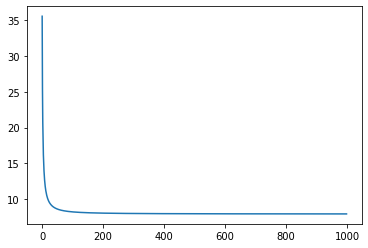

In [49]:
xdata_set = torch.load(data_pathx)
ydata_set = torch.load(data_pathy)
data_set =xdata_set,ydata_set
#ndata = data_set.size(0)
#data_set = data_set.view(ndata,1)
la = 0.00001
px = makepx(data_set,la,sigma = 1.41,Niter = 1000)

In [50]:
c,r,ntest = 0,5,10000
xtest = torch.linspace(c-r,c+r,ntest).view(ntest,1)
#c,r,ntest = 0,10,100000
#xtest = c + r*(2*torch.rand(ntest,d) - 1)
#xtest,_ = xtest.sort(dim=0)
ytest = px(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = px(xdata_set)


torch.save(xtest,pt_path+'xtest_NW1.pt')
torch.save(ytest,pt_path+'ytest_NW1.pt')
torch.save(ydata_set,pt_path+'ydata_NW1.pt')

#torch.save(xtest,pt_path+'xtest_ours0.pt')
#torch.save(ytest,pt_path+'ytest_ours0.pt')
#torch.save(ydata_set,pt_path+'ydata_ours0.pt')



integral = tensor([[1.1536]])
integral = tensor([[1.1536]])


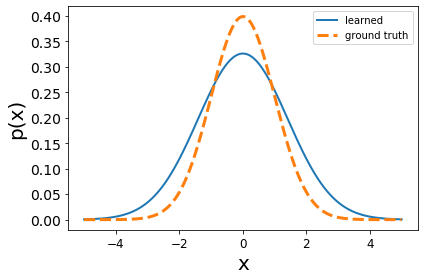

In [51]:
xtest = torch.load(pt_path+'xtest_NW1.pt')
ytest = torch.load(pt_path+'ytest_NW1.pt')
xdata = torch.load(pt_path+'xdataExperiments.pt')
ydata_set = torch.load(pt_path+'ydata_NW1.pt')


#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


ytestref = density_fun(xtest)



fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
fig.savefig('linearPlot10000density.pdf' , format='pdf', dpi=1000)
plt.show()